In [1]:
%run ../template.ipynb

In [2]:
exp_id = "050318"
series_names = ["mainstream", "maxsharing", "nosharing"]

In [3]:
setups = dataloaders.load_setups(exp_id, setup_file_str="/setups.{exp_id}-3{version}.pickle")
setups.update(dataloaders.load_setups(exp_id, setup_file_str="/setups.{exp_id}-4{version}.pickle"))

Loading setups... Done
Loading setups... Done


In [4]:
rows = []
for series_name in series_names:
    schedules = dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*-3.v1", setups=setups)
    schedules += dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*-4.v1", setups=setups)
    # Extract some attributes from the schedules.
    # Add on some based on the file name.
    rows += ex(schedules,
               each=lambda s: {'f1': mean(s.f1s), 'fps': mean(s.fpses), 'num_apps': s.num_apps, 'budget': s.budget},
               constant={'scheduler': 'greedy', 'sharing': series_name})
df = comb(rows)

In [5]:
# See Pandas: Group By: split-apply-combine
# https://pandas.pydata.org/pandas-docs/stable/groupby.html
print(df.columns)
df_view = df[df['budget'] == 100]
# Group <setups> by number of apps, aggregate by mean.
grouped = df_view.groupby(['sharing', 'num_apps'])

aggregated = grouped['f1'].mean()
unstacked = aggregated.unstack(0)
xss, yss = zip(*[(unstacked[k].index, unstacked[k].values) for k in series_names])
series = [Series(x=xs, y=ys, name=sn, plotstyle=sn) for xs, ys, sn in zip(xss, yss, series_names)]
# plotstyles = [styles.SERIES[series_name] for series_name in series_names]
# series = [Series(x=xs, y=ys, name=sn, plotstyle=ps) for xs, ys, ps, sn in zip(xss, yss, plotstyles, series_names)]

Index([u'budget', u'f1', u'fps', u'num_apps', u'scheduler', u'sharing'], dtype='object')


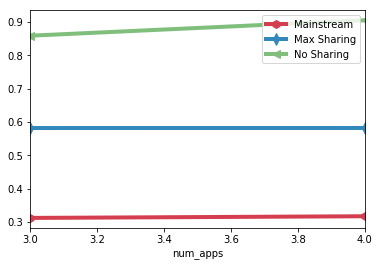

In [6]:
plotparams = dict(lw=4, markersize=8)
plot.variants(series, plot_kwargs=plotparams)
plot.save('scheduler', exp_id, 'f1')